This script visualizes daily temperatures calculated using driver data from the example folder and measured data from the corresponding permafrost monitoring station. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import subprocess
from matplotlib import pyplot as plt

For some years snow depth needd to corrected to match warm tempratures in the sping. Tair>0 -> no snow. 

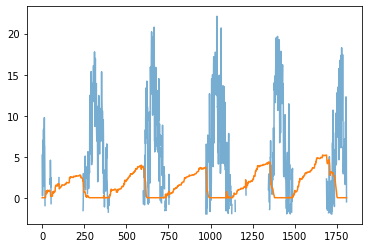

In [79]:
ubound_file='in/bound.txt'
ubound = np.loadtxt(ubound_file, skiprows=1,  unpack=False)
df_tair = pd.DataFrame(ubound[:,-1:], columns=['Tair [C]']) 

snow_file='in/snow.txt'
dsnow = np.loadtxt(snow_file, skiprows=1,  unpack=False)
df_dsnow = pd.DataFrame(dsnow[:,-1:], columns=['snow depth[m]']) 

rsnow_file='in/rsnow.txt'
rsnow = np.loadtxt(rsnow_file, skiprows=1,  unpack=False)
df_rsnow = pd.DataFrame(rsnow[:,-1:], columns=['snow cond[W/m/K]']) 

plt.plot(df_tair[df_tair>-2], alpha=0.6)
plt.plot(df_dsnow*10)

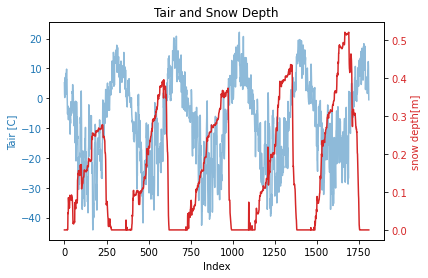

In [71]:
# Ensure that the indices match or align them if necessary
df_tair.index = pd.RangeIndex(start=0, stop=len(df_tair), step=1)
df_dsnow.index = pd.RangeIndex(start=0, stop=len(df_dsnow), step=1)

# Create the plot with two y-axes
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis
ax1.plot(df_tair.index, df_tair['Tair [C]'], color='tab:blue', alpha=0.5)
ax1.set_xlabel('Index')
ax1.set_ylabel('Tair [C]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis and plot the second dataset
ax2 = ax1.twinx()
ax2.plot(df_dsnow.index, df_dsnow['snow depth[m]'], color='tab:red')
ax2.set_ylabel('snow depth[m]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and show the plot
plt.title('Tair and Snow Depth')
plt.show()

Load calculated and measured temperatures. 

In [91]:
def load_calc():
    calc_file='out/result.txt'
    calc_data = np.loadtxt(calc_file, skiprows=0,  unpack=False)
    calc_header=['id','time','Tair','snow','0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m' ]
    df = pd.DataFrame(calc_data, columns=calc_header) 
    return df

def load_meas():
    meas_file='mesres.txt'
    df_meas =  np.loadtxt(meas_file, skiprows=0,  unpack=False)#pd.read_csv(meas_file)
    df = pd.DataFrame(df_meas, columns=['0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m'])
    return df

df_calc=load_calc()
df_meas=load_meas()

Text(0.5, 1.0, 'Calculated ground temperatures ')

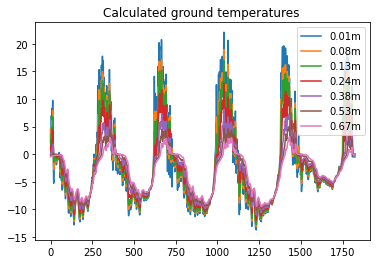

In [92]:
df_calc[['0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m']].plot()
plt.title('Calculated ground temperatures ')

Text(0.5, 1.0, 'Measured ground temperatures ')

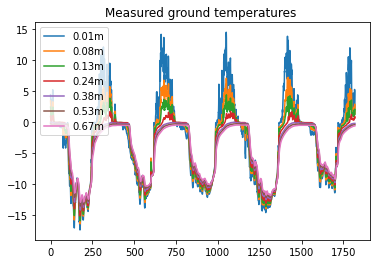

In [81]:
df_meas.plot()
plt.title('Measured ground temperatures ')

In [93]:
df_calc.shape

(1825, 11)

In [105]:
df_calc=load_calc() 
[ndays,ncols]=df_calc.shape
ndays,ncols

(365, 11)

In [103]:
df_meas.iloc[:365,:]

,0.01m,0.08m,0.13m,0.24m,0.38m,0.53m,0.67m
0,4.469,3.453,2.457,0.930,0.010,-0.188,-0.495
1,3.846,2.959,2.253,1.054,0.019,-0.296,-0.568
2,0.732,0.966,1.012,0.714,-0.013,-0.292,-0.567
3,0.181,0.256,0.350,0.297,-0.014,-0.296,-0.567
4,0.677,0.515,0.449,0.209,-0.055,-0.296,-0.567
...,...,...,...,...,...,...,...
360,6.664,4.631,3.303,1.507,-0.065,-0.342,-0.613
361,4.019,3.136,2.637,1.475,-0.020,-0.335,-0.592
362,2.373,1.764,1.490,0.871,-0.024,-0.335,-0.567
363,3.520,2.351,1.671,0.712,-0.058,-0.336,-0.568


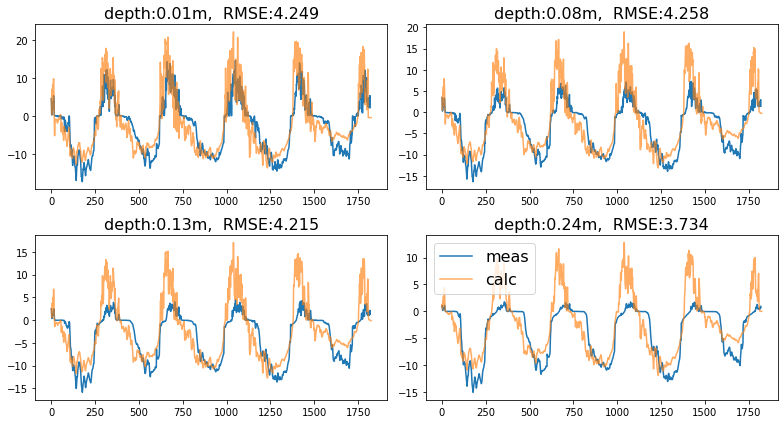

In [110]:
def plot_ground_temps(hh):
    df_calc=load_calc()  #update calculated data
    [ndays,ncols]=df_calc.shape
    df_meas=load_meas() 
    #match the number of days in meas with calc
    df_meas=df_meas.iloc[:ndays,:]

    fig = plt.figure()
    fig.set_figheight(6); fig.set_figwidth(11)
    for i,ih in zip(range(4),hh):
        RMSE=np.sqrt(np.mean((df_meas[ih]-df_calc[ih])**2))
        fig.add_subplot(2,2,i+1)
        plt.title('depth:'+str(ih)+',  RMSE:'+str(round(RMSE,3)),fontsize=16 )
        plt.plot(df_meas[ih])
        plt.plot(df_calc[ih],alpha=0.65)
    plt.legend(['meas','calc'],fontsize=16)
    fig.tight_layout()

subprocess.call(["./gipl"])
hh=['0.01m', '0.08m', '0.13m', '0.24m']
plot_ground_temps(hh)

### Working with 1 year dataset
chage end date in the gipl_config.cfg to 1.  

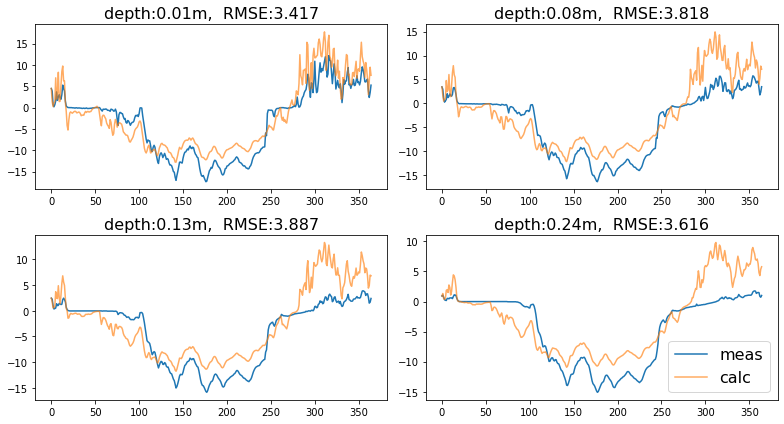

In [111]:
subprocess.call(["./gipl"])
hh=['0.01m', '0.08m', '0.13m', '0.24m']
plot_ground_temps(hh)